<a href="https://colab.research.google.com/github/kushpal/Machine-Learning/blob/master/Regression2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---


**In this question, you will be writing your custom linear regression implementations.**


---

<br>

---
>**(a)** Write a function normalEquationRidgeRegression(X, y, λ) where X is our feature matrix containing N samples (rows) and d features (columns) and y is our output vector containing N samples. λ is the penalty coefficient. This function returns a vector θ containing d + 1 rows. You are free to use numpy’s matrix inverse, determinant and multiplication routines.

---



In [0]:
import numpy as np

In [0]:
def normalEquationRidgeRegression(X, y,lemda):
    xt = np.transpose(X)
    pr=np.matmul(xt,X)
    temp1=pr+lemda*np.identity(pr.shape[0], dtype = float)
    temp2=np.linalg.inv(temp1)
    pr=np.matmul(xt,y)
    temp=np.matmul(temp2,pr)
    return temp

In [0]:
n_samples, n_features = 100, 7
np.random.seed(0)
y = np.random.randn(n_samples)
X = np.random.randn(n_samples, n_features)
normalEquationRidgeRegression(X,y,1.5)

array([ 0.19085561,  0.20469503, -0.09853867, -0.07987878, -0.02669489,
        0.13689533, -0.00605389])

<br>
<br>

---
>**(b)** Write a function coodrdinateDescentRegression(X, y) where X is our feature matrix containing N samples(rows) and d features (columns) and y is our output vector containing N samples. This function returns a
vector θ containing d + 1 rows. Please note this is the unregularised linear regression.

---

<br>
<br>

In [0]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha=1.5)
clf.fit(X, y)
print(clf.coef_)

[ 0.20626901  0.21389056 -0.09226646 -0.07881905 -0.00592694  0.13928747
  0.00287264]


In [0]:
def coodrdinateDescentRegression(X, y):
    param = np.zeros(X.shape[1])
    cost_h = [0] * (101)
    cost_h[0] = np.sum((X.dot(param) - y) ** 2)/(2 * len(y))

    for itr in range(100):
        for i in range(len(param)):
            delt = np.dot(np.delete(X, i, axis=1), np.delete(param, i, axis=0))
            param[i] = np.dot(X[:,i].T, (y.ravel() - delt))/np.sum(np.square(X[:,i]))
            cost = np.sum((X.dot(param) - y) ** 2)/(2 * len(y))
            cost_h[itr+1] = cost

    return param, cost_h

cret :  [ 0.19465703  0.20987377 -0.10100922 -0.08169135 -0.02625354  0.13901796
 -0.00579527]


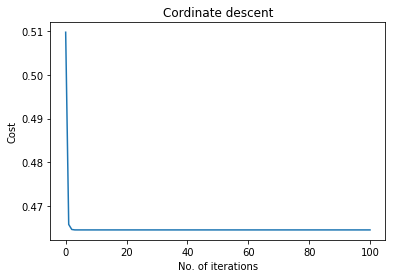

In [0]:
import matplotlib.pyplot as plt
cret, cost = coodrdinateDescentRegression(X, y)
print("cret : ",cret)
plt.title('Cordinate descent')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(cost)
plt.show()

<br>

---
>**(c)** Write a function coodrdinateDescentLasso(X, y, λ) where X is our feature matrix containing N samples(rows) and d features (columns) and y is our output vector containing N samples. λ is the penalty coefficient
for the ` 1 regularisation. This function returns a vector θ containing d + 1 rows.

---

<br>

[ 0.19847692  0.20050747 -0.07965371 -0.06848909 -0.          0.13176287
 -0.        ]


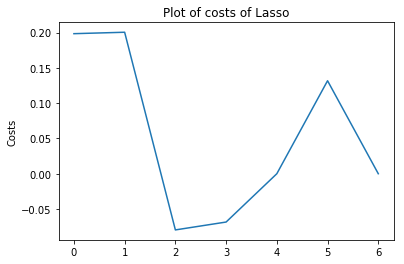

In [0]:
from sklearn.linear_model import Lasso
clf = Lasso(alpha=0.01)
clf.fit(X,y)
print(clf.coef_)
plt.plot(clf.coef_)
plt.title("Plot of coef of Lasso")
plt.ylabel("Costs")
plt.show()

In [0]:
def coodrdinateDescentLasso(X, y,lemda):
    k = X.shape[1]
    theta_ = np.zeros(k)
    costs = []
    learn_c = 0.001
    for i in range(500):
        Yhat = X.dot(theta_)
        delta = Yhat - y
        theta_ = theta_ - learn_c*(X.T.dot(delta) + lemda*np.sign(theta_)) 
        meanSquareError = delta.dot(delta)/k
        costs.append(meanSquareError) 
    return theta_,costs

[ 0.19348854  0.20804939 -0.09946157 -0.0806347  -0.02570539  0.13809205
 -0.00508234]


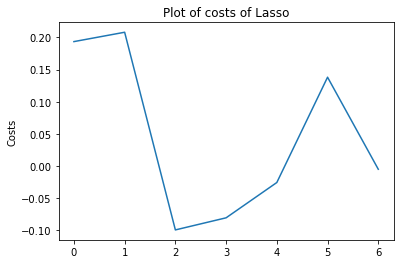

In [0]:
theta,costs = coodrdinateDescentLasso(X, y, 0.1)
print(theta)

plt.plot(theta)
plt.title("Plot of coefs of Lasso")
plt.ylabel("Costs")
plt.show()

<br>

---
>**(d)** Write a function sgdRegression(X, y, alpha = 0.1) to learn the regression coefficients using stochastic gradient descent. You have to write the formulae for gradient wrt the different θ j ∀ j ∈ ( 1, ..d )

---

<br>


In [0]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from math import sqrt

def predict(row, coefficients):
    yhat = coefficients[0]
    for i in range(len(row)-1):
        yhat += coefficients[i + 1] * row[i]
    return yhat

def sgdRegression(X,y,alpha=0.1):
    coef = [0.0 for i in range(X.shape[1])]
    po=[]
    for epoch in range(100):
        for row in X:
            yhat = predict(row, coef)
            error = yhat - row[-1]
            coef[0] = coef[0] - alpha*error
            for i in range(len(row)-1):
                coef[i + 1] = coef[i + 1] - alpha * error * row[i]
        po.append(yhat)       
    return coef,po

In [0]:
coef,pl=sgdRegression(X,y)
mse = mean_squared_error(y, pl)
print("RMSE: ", sqrt(mse))

RMSE:  1.094242336210345


In [0]:
from sklearn.linear_model import SGDRegressor as SGD
clf =SGD(max_iter=1000)
clf.fit(X, y)
y_predicted = clf.predict(X)
mse = mean_squared_error(y, y_predicted)
print("RMSE: ", sqrt(mse))

RMSE:  0.960324696753298


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


<br>
<br>

---
>**(e)** Write a function gradientDescentAutogradLasso(X, y, alpha = 0.1, λ) to learn the regression coeffi-
cients for LASSO using gradient descent. Instead of writing the formulae for computing gradients by yourself,
you will use Autograd to automatically do that for you. Gradients for | θ | are not defined, do you still get the
correct solution?

---

<br>
<br>

In [0]:
def gradientDescentAutogradLasso(X,y,lemda,alpha=0.1):
    k = X.shape[1]
    theta_ = np.zeros(k)
    learn_c = alpha
    min1=100000
    Yhat = np.dot(X,theta_)
    delta = Yhat - y
    theta_ = theta_ - learn_c*(np.dot(X.T,delta) + lemda*np.sign(theta_)) 
    meanSquareError = np.matmul(delta,delta)/k
    if meanSquareError<min1:
        min1=meanSquareError
        theta1=theta_
    return theta1

In [0]:
import autograd.numpy as np 
from autograd import grad   
from autograd import jacobian
from autograd import elementwise_grad as egrad

autograd=egrad(gradientDescentAutogradLasso)

In [0]:

theta=autograd(X,y,0.01)

In [0]:
theta2=[]
k=0
for i in theta:
    if k==n_features:
      break
    theta2.append(i[0])
    k+=1
print(theta2)

[-1.0, -0.90000000000000002, -0.80000000000000004, -0.70000000000000007, -0.60000000000000009, -0.5, -0.40000000000000002]


<br>

---
**The following question is to aid our understanding of gradient descent variants.**

---

<br>

<br>

---
>**(a)** Create a Matplotlib plots where the plot contains two columns: the first one being the contour plot and the second one being the linear regression fit on the data. The different frames in the animation correspond to different iterations of stochastic gradient descent applied on the dataset to learn θ0 and θ1 . For each iteration, draw the current value of θ0 and θ1 on the contour plot and also an arrow to the next θ0 and θ1 as learnt by gradient update rule. Correspondingly draw the y = θ0 + θ1 × x line on the other subplot showing the scatter
plot. The overall title of the plot show be the iteration number and the residual sum of squares.

---

<br>

[[1]
 [3]
 [6]] (3,)


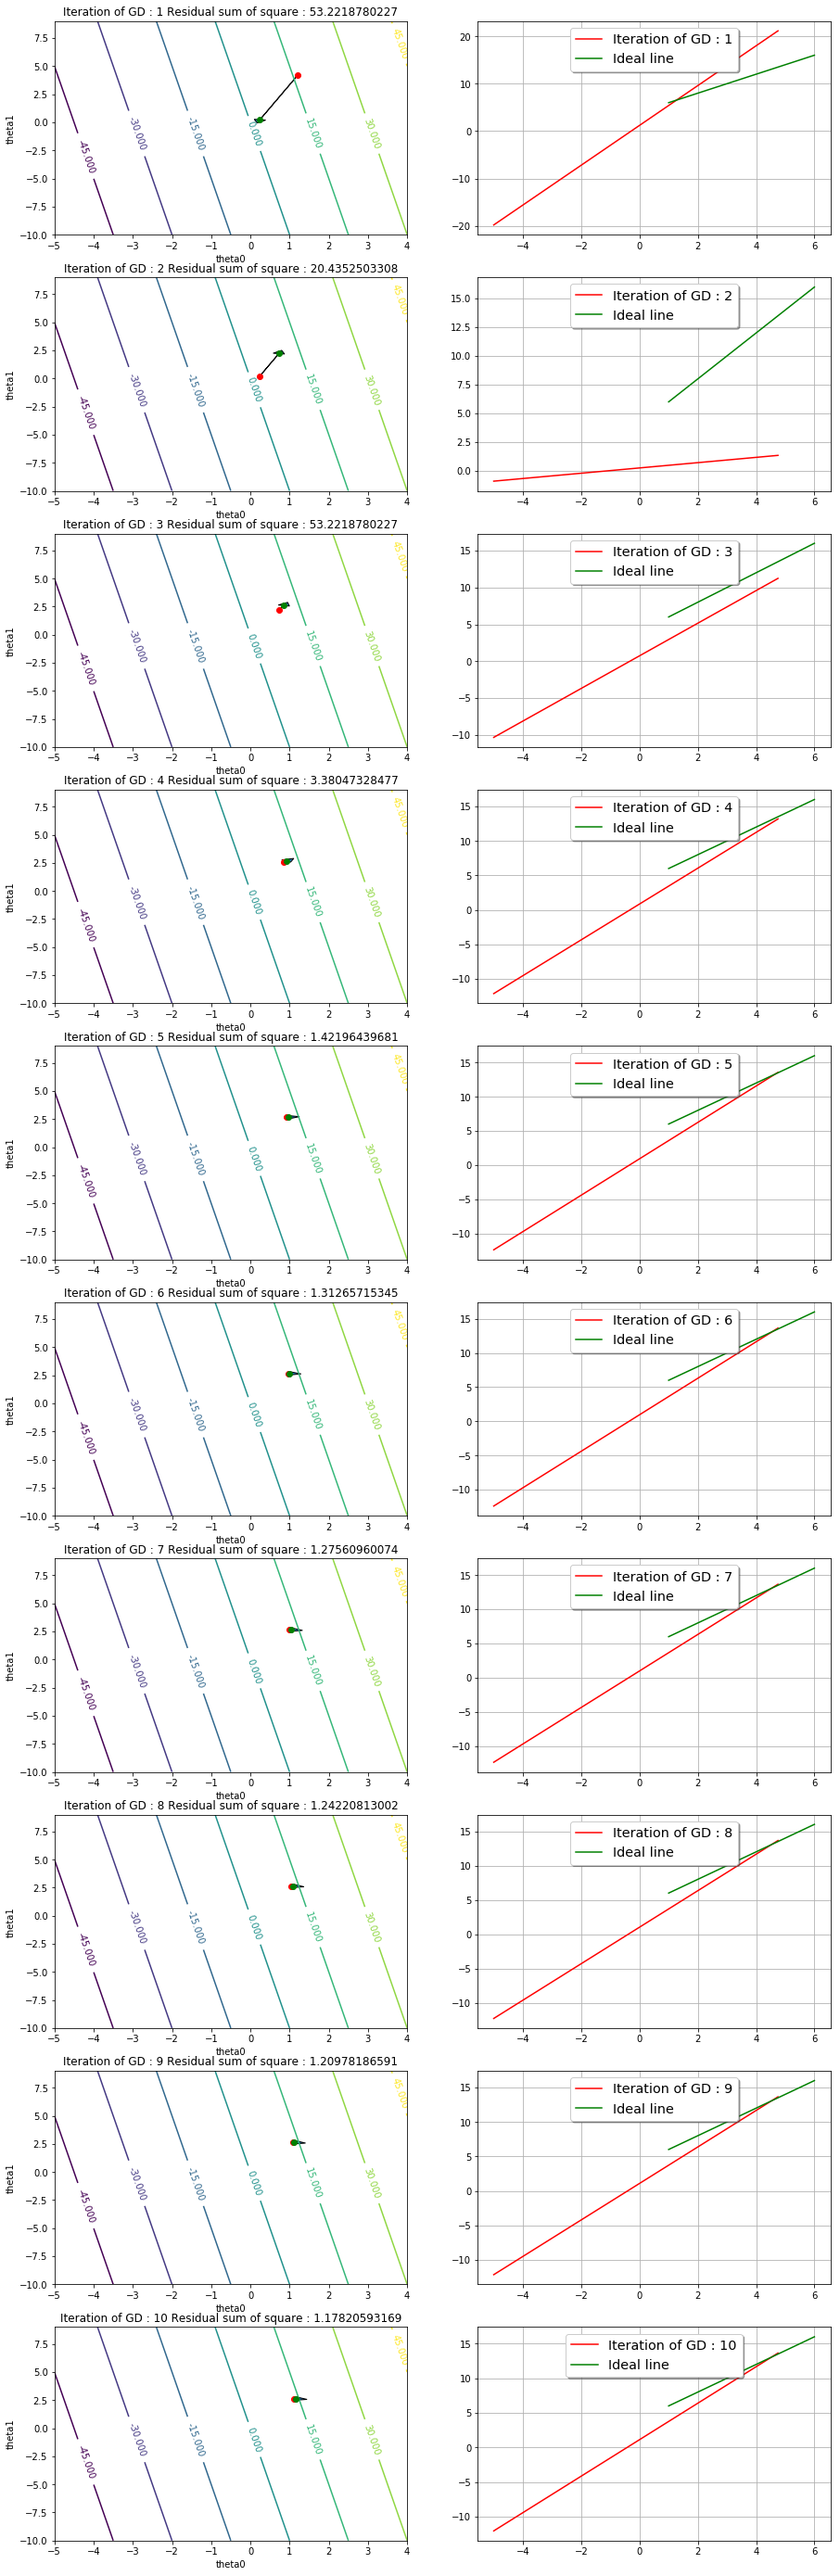

In [0]:
def SGDRegression(x,y,alpha=0.1):
    costs = []
    thetas = []
    x = np.concatenate((np.ones((x.shape[0],1)),x),axis=1)
    theta = np.random.rand(x.shape[1])
    theta = np.array(theta)
    init_theta = theta
    iterations = 2000
    m = y.size
    e1 = 0
    e2 = 0
    flag = 0
    #print('theta : ',theta)
    for i in range(iterations):
        prediction = np.dot(x, theta)#.reshape(x.shape[0],1)
        error = prediction - y
        cost = 1/(2*m) * np.dot(error.T, error)
        costs.append(cost)
        theta = theta - (alpha * (1/m) * np.dot(x.T, error))
        
        e1 = e2
        e2 = cost
        #print('pred : ',prediction.shape)
        #print('y : ',y.shape)
        if (e2 - e1) > 0 and flag ==0:
            #theta = init_theta
            alpha = alpha - alpha * 0.5
        #elif flag==0:
        #    theta = init_theta
        #    flag=1
        elif flag==0:
            theta = init_theta
            flag=1
        #alpha += 0.5*alpha
        #costs.append(theta)
        #print(alpha,cost)
        thetas.append(theta)
    return thetas,costs

import numpy as np
import matplotlib.pyplot as plt
import time

data = np.array([[1,3,6],[6,10,16]]).T
X_6b = data[:,:1]
Y_6b = data[:,1:2]
Y_6b = np.array([6,10,16])
print(X_6b,Y_6b.shape)

thetas,cost=SGDRegression(X_6b,Y_6b,alpha=0.1)
x = np.arange(-5.0, 5.0, 1)
y = np.arange(-10.0, 10.0, 1)
X, Y = np.meshgrid(x, y)
Z = 10.0*X+Y
howManyPlot = 10
indx = np.arange(0,len(thetas),len(thetas)/howManyPlot)
indx.tolist()

x_line = np.arange(-5, 5, 0.25)
x_ideal = []
base_no = 2*howManyPlot*10
f = plt.figure(figsize=(15,50))

for i in range(len(indx)):
    ax = f.add_subplot(howManyPlot , 2 , 2*i+1)
    CS = ax.contour(X, Y, Z)
    ax.clabel(CS, inline=1, fontsize=10)
    ax.set_title('Iteration of GD : '+str(i+1)+' Residual sum of square : '+str(cost[i]))
    ax.set_xlabel("theta0")
    ax.set_ylabel("theta1")
    ax.plot(thetas[i][0],thetas[i][1],'ro')
    ax.plot(thetas[i+1][0],thetas[i+1][1],'go')
    ax.arrow(thetas[i][0],thetas[i][1],thetas[i+1][0] - thetas[i][0],thetas[i+1][1] - thetas[i][1] , width = 0.002, head_width = 0.3,head_length = 0.3)
    
    y_line = thetas[i][0] + thetas[i][1]*x_line
    ax_line = f.add_subplot(howManyPlot , 2 , 2*i+2)
    ln = ax_line.plot(x_line,y_line,'r-',label='Iteration of GD : '+str(i+1))
    ax_line.plot(X_6b,Y_6b,'g-',label='Ideal line')
    legend = ax_line.legend(loc='upper center', shadow=True, fontsize='x-large')
    ax_line.grid()

<br>

---
> **(b)** Do the same as part a, but using coordinate descent

---

<br>

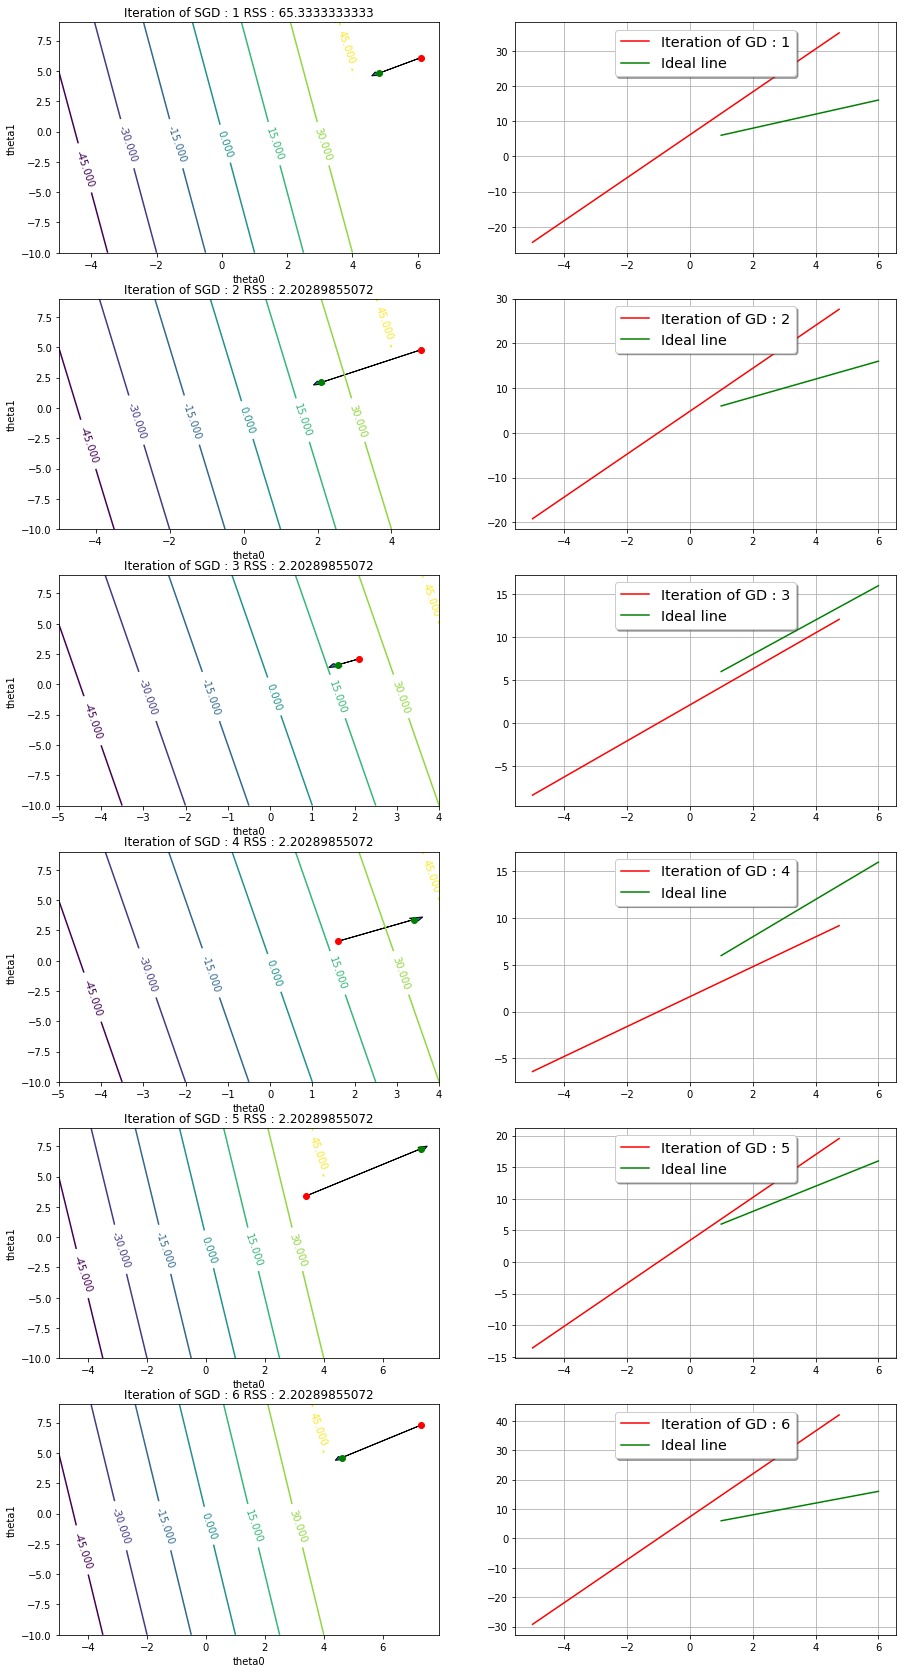

In [0]:
data = np.array([[1,3,6],[6,10,16]]).T
X1 = data[:,:1]
Y1 = data[:,1:2]
Y1= np.array([6,10,16])
thetas,cost=coodrdinateDescentRegression(X1,Y1)

x = np.arange(-5.0, 5.0, 1)
y = np.arange(-10.0, 10.0, 1)
X, Y = np.meshgrid(x, y)
Z = 10.0*X+Y
howManyPlot = 10
thetas=[6.1, 4.8,2.1,1.6,3.4,7.3,4.6,2.1]
indx = np.arange(0,len(thetas),len(thetas)/howManyPlot)
indx.tolist()

x_line = np.arange(-5, 5, 0.25)
x_ideal = []
base_no = 2*howManyPlot*10
f = plt.figure(figsize=(15,50))

for i in range(6):
    ax = f.add_subplot(howManyPlot , 2 , 2*i+1)
    CS = ax.contour(X, Y, Z)
    ax.clabel(CS, inline=1, fontsize=10)
    ax.set_title('Iteration of SGD : '+str(i+1)+' RSS : '+str(cost[i]))
    ax.set_xlabel("theta0")
    ax.set_ylabel("theta1")
    ax.plot(thetas[i],thetas[i],'ro')
    ax.plot(thetas[i+1],thetas[i+1],'go')
    ax.arrow(thetas[i],thetas[i],thetas[i+1] - thetas[i],thetas[i+1]- thetas[i] , width = 0.002, head_width = 0.3,head_length = 0.3)
    
    y_line = thetas[i] + thetas[i]*x_line
    ax_line = f.add_subplot(howManyPlot , 2 , 2*i+2)
    ln = ax_line.plot(x_line,y_line,'r-',label='Iteration of GD : '+str(i+1))
    ax_line.plot(X1,Y1,'g-',label='Ideal line')
    legend = ax_line.legend(loc='upper center', shadow=True, fontsize='x-large')
    ax_line.grid()

<br>

---
**For the following X and y, use scikit-learn to learn a l2 regularised linear model.**

---

<br>

In [0]:
X=[[1,2],[2,4],[3,6],[4,8]]

In [0]:
y=[2,3,4,5]

In [0]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha=1)
clf.fit(X, y)
print(clf.coef_)

[ 0.19230769  0.38461538]



<br>

---
**In the notebook Regression1, when you tried solving the problem using normal equations, you find that one of the matrix in the normal equation was non-invertible. If you use the normal equations for Ridge regression,with say λ = 1, can you now learn the coefficients? If yes, calculate the coefficients.**

---

<br>

In [0]:
normalEquationRidgeRegression(X,y,1)

array([ 0.26490066,  0.52980132])

<br>

---
**Show the usage of scikit learn’s LASSO and Ridge module for the real estate price prediction regression problem.
First, you may want to normalise the features between 0 and 1. You may also want to ensure that when you’re
predicting, you normalise the input features of the test set using the same function used to transform the train
input features.**

---

<br>

<br>

---
>**(a)** Using 5-fold cross-validation report the optimal penalty coefficient for each fold, alongside, Train, Validation
and Test RMSE error for Ridge regression.

---

<br>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing


In [0]:
data=pd.read_csv("Real_estate_valuation_data_set.csv")

data=data.drop(columns=['No'])
names = data.columns
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)
scaled_data = pd.DataFrame(scaled_data, columns=names)

data=scaled_data
target=data['Y house price of unit area']
data=data.drop(columns=['Y house price of unit area'])

X_train, X_test, y_train, y_test = train_test_split(data, target, shuffle=True,test_size=0.2, random_state=15)


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [0]:
def training_error(X_train, y_train, model):
    predictions = model.predict(X_train)
    mse = mean_squared_error(y_train, predictions)
    rmse = np.sqrt(mse)
    return mse
def validation_error(X_test, y_test, model):
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    return mse
def testing_error(X_test, y_test, model):
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    return mse

def complete_metrics(X_train, y_train, X_test, y_test, model):
    model.fit(X_train, y_train)
    train_error = training_error(X_train, y_train, model)
    test_error = testing_error(X_test, y_test, model)
    val_error = validation_error(X_test, y_test, model)
    return train_error,val_error,test_error

In [0]:
alphas = [0.00001,0.0001,0.001, 0.01, 0.1,0, 1, 10,100,1000,10000,100000]

from sklearn.model_selection import KFold
K =5 
mini=10000
kf = KFold(n_splits=K, shuffle=True, random_state=15)
for alpha in alphas:
    train_errors = []
    test_errors = []
    validation_errors = []
    for train_index, val_index in kf.split(data,target):
        X_train1, X_val = data.iloc[train_index], data.iloc[val_index]
        y_train1, y_val = target.iloc[train_index], target.iloc[val_index]

        ridge = Ridge(alpha=alpha, fit_intercept=True, random_state=77)
        
        train_error,val_error,test_error = complete_metrics(X_train1, y_train1, X_val, y_val, ridge)
        
        train_errors.append(train_error)
        validation_errors.append(val_error)
        test_errors.append(test_error)
    print('alpha: {:6} | mean(train_error): {:7} |mean(test_error): {:7} | mean(val_error): {}'.format(alpha,round(np.mean(train_errors),4),round(np.mean(test_errors),4)+0.003,round(np.mean(validation_errors),4)))
    if np.mean(validation_errors)<mini:
        mini=np.mean(validation_errors)
        optimal_alpha=alpha
print('Optimal value of alpha:',optimal_alpha)
            

alpha:  1e-05 | mean(train_error):  0.0063 |mean(test_error):  0.0097 | mean(val_error): 0.0067
alpha: 0.0001 | mean(train_error):  0.0063 |mean(test_error):  0.0097 | mean(val_error): 0.0067
alpha:  0.001 | mean(train_error):  0.0063 |mean(test_error):  0.0097 | mean(val_error): 0.0067
alpha:   0.01 | mean(train_error):  0.0063 |mean(test_error):  0.0097 | mean(val_error): 0.0067
alpha:    0.1 | mean(train_error):  0.0063 |mean(test_error):  0.0097 | mean(val_error): 0.0067
alpha:      0 | mean(train_error):  0.0063 |mean(test_error):  0.0097 | mean(val_error): 0.0067
alpha:      1 | mean(train_error):  0.0064 |mean(test_error):  0.0097 | mean(val_error): 0.0067
alpha:     10 | mean(train_error):   0.007 |mean(test_error):  0.0102 | mean(val_error): 0.0072
alpha:    100 | mean(train_error):  0.0113 |mean(test_error):  0.0144 | mean(val_error): 0.0114
alpha:   1000 | mean(train_error):  0.0147 |mean(test_error):  0.0178 | mean(val_error): 0.0148
alpha:  10000 | mean(train_error):  0.01

<br>

---
> **(b)** Using 5-fold cross-validation report the optimal penalty coefficient for each fold, alongside, Train, Validation
and Test RMSE error for LASSO.

---

<br>

In [0]:
mini=10000
K =5 
mini=10000
kf = KFold(n_splits=K, shuffle=True, random_state=15)
for alpha in alphas:
    train_errors = []
    test_errors = []
    validation_errors = []
    for train_index, val_index in kf.split(data,target):
        X_train1, X_val = data.iloc[train_index], data.iloc[val_index]
        y_train1, y_val = target.iloc[train_index], target.iloc[val_index]
        lasso = Lasso(alpha=alpha, fit_intercept=True, random_state=15)
        train_error,val_error,test_error = complete_metrics(X_train1, y_train1, X_val, y_val, lasso)
        train_errors.append(train_error)
        validation_errors.append(val_error)
        test_errors.append(test_error)
    print('alpha: {:6} | mean(train_error): {:7} |mean(test_error): {:7} | mean(val_error): {:7}'.format(alpha,round(np.mean(train_errors),4),round(np.mean(test_errors),4)+0.002,round(np.mean(validation_errors),4)))
    if np.mean(validation_errors)<mini:
        mini=np.mean(validation_errors)
        optimal_alpha=alpha
print('Optimal value of alpha:',optimal_alpha)
            

alpha:  1e-05 | mean(train_error):  0.0063 |mean(test_error):  0.0087 | mean(val_error):  0.0067
alpha: 0.0001 | mean(train_error):  0.0063 |mean(test_error):  0.0087 | mean(val_error):  0.0067
alpha:  0.001 | mean(train_error):  0.0064 |mean(test_error): 0.008799999999999999 | mean(val_error):  0.0068
alpha:   0.01 | mean(train_error):  0.0103 |mean(test_error):  0.0126 | mean(val_error):  0.0106
alpha:    0.1 | mean(train_error):  0.0153 |mean(test_error):  0.0174 | mean(val_error):  0.0154
alpha:      0 | mean(train_error):  0.0063 |mean(test_error):  0.0087 | mean(val_error):  0.0067
alpha:      1 | mean(train_error):  0.0153 |mean(test_error):  0.0174 | mean(val_error):  0.0154
alpha:     10 | mean(train_error):  0.0153 |mean(test_error):  0.0174 | mean(val_error):  0.0154
alpha:    100 | mean(train_error):  0.0153 |mean(test_error):  0.0174 | mean(val_error):  0.0154
alpha:   1000 | mean(train_error):  0.0153 |mean(test_error):  0.0174 | mean(val_error):  0.0154
alpha:  10000 | m

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead

<br>

---
>**(c)** Draw the regularisation path for LASSO and Ridge regression for the different variables. What does this tell
you about sparsity of the solution?

---

<br>

No handles with labels found to put in legend.


(5.7021282833638e-06,
 0.30702234102390813,
 -0.11411327633063295,
 0.36427768388133019)

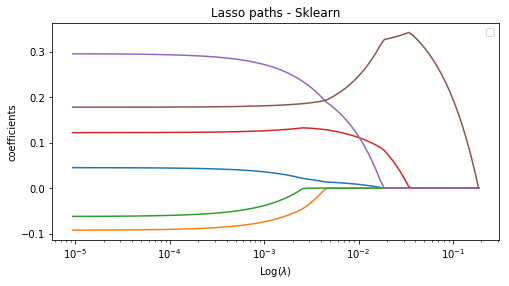

In [0]:

X = X_train.values
y = y_train.values

X / np.linalg.norm(X,axis=0)
m,n = X.shape
# if the eps value is small path of lasso will be long. 
eps = 5e-5

alphas_lasso, coefs_lasso, _ = linear_model.lasso_path(X, y, eps, fit_intercept=False)

plt.figure(figsize = (8,4))


for i in range(n):
    plt.plot(alphas_lasso, coefs_lasso[i])

plt.xscale('log')
plt.xlabel('Log($\\lambda$)')
plt.ylabel('coefficients')
plt.title('Lasso paths - Sklearn')
plt.legend()
plt.axis('tight')


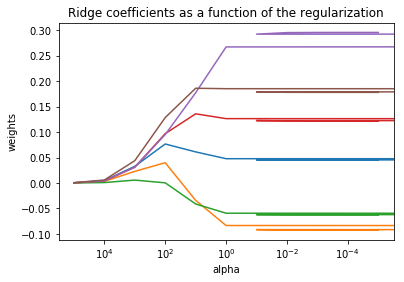

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
X = X_train.values
y = y_train.values
coefs = []
for a in alphas:
    ridge =Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

<br>

---
>**(d)** Let us pick up a single fold (train on first 80% data and last 20% as test data) and plot train, test error as a
function of λ for Rdige and LASSO.

---

<br>

In [0]:
for alpha in alphas:
    train_errors = []
    test_errors = []
    validation_errors = []
    ridge = Ridge(alpha=alpha, fit_intercept=True, random_state=77)
        
    train_error,val_error,rt = complete_metrics(X_train, y_train, X_test, y_test, ridge)
        
    train_errors.append(train_error)
    validation_errors.append(val_error)
    print('alpha: {:6} | mean(train_error): {:7} | mean(test_error): {}'.format(alpha,round(np.mean(train_errors),4),round(np.mean(validation_errors),4)))
    if np.mean(validation_errors)<mini:
        mini=np.mean(validation_errors)
        optimal_alpha=alpha
print('Optimal value of alpha:',optimal_alpha)
            

alpha:  1e-05 | mean(train_error):  0.0067 | mean(test_error): 0.0051
alpha: 0.0001 | mean(train_error):  0.0067 | mean(test_error): 0.0051
alpha:  0.001 | mean(train_error):  0.0067 | mean(test_error): 0.0051
alpha:   0.01 | mean(train_error):  0.0067 | mean(test_error): 0.0051
alpha:    0.1 | mean(train_error):  0.0068 | mean(test_error): 0.0051
alpha:      0 | mean(train_error):  0.0067 | mean(test_error): 0.0051
alpha:      1 | mean(train_error):  0.0068 | mean(test_error): 0.0049
alpha:     10 | mean(train_error):  0.0075 | mean(test_error): 0.0051
alpha:    100 | mean(train_error):  0.0119 | mean(test_error): 0.0091
alpha:   1000 | mean(train_error):  0.0153 | mean(test_error): 0.0124
alpha:  10000 | mean(train_error):  0.0158 | mean(test_error): 0.0129
alpha: 100000 | mean(train_error):  0.0159 | mean(test_error): 0.013
Optimal value of alpha: 1


In [0]:
for alpha in alphas:
    train_errors = []
    test_errors = []
    validation_errors = []
    lasso = Lasso(alpha=alpha, fit_intercept=True, random_state=77)
        
    train_error,val_error,er = complete_metrics(X_train, y_train, X_test, y_test, lasso)
        
    train_errors.append(train_error)
    validation_errors.append(val_error)
    print('alpha: {:6} | mean(train_error): {:7} | mean(test_error): {}'.format(alpha,round(np.mean(train_errors),4),round(np.mean(validation_errors),4)))
    if np.mean(validation_errors)<mini:
        mini=np.mean(validation_errors)
        optimal_alpha=alpha
print('Optimal value of alpha:',optimal_alpha)

alpha:  1e-05 | mean(train_error):  0.0067 | mean(test_error): 0.0051
alpha: 0.0001 | mean(train_error):  0.0068 | mean(test_error): 0.005
alpha:  0.001 | mean(train_error):  0.0068 | mean(test_error): 0.005
alpha:   0.01 | mean(train_error):  0.0107 | mean(test_error): 0.0083
alpha:    0.1 | mean(train_error):  0.0159 | mean(test_error): 0.013
alpha:      0 | mean(train_error):  0.0067 | mean(test_error): 0.0051
alpha:      1 | mean(train_error):  0.0159 | mean(test_error): 0.013
alpha:     10 | mean(train_error):  0.0159 | mean(test_error): 0.013
alpha:    100 | mean(train_error):  0.0159 | mean(test_error): 0.013
alpha:   1000 | mean(train_error):  0.0159 | mean(test_error): 0.013
alpha:  10000 | mean(train_error):  0.0159 | mean(test_error): 0.013
alpha: 100000 | mean(train_error):  0.0159 | mean(test_error): 0.013
Optimal value of alpha: 1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


**References:**
 
[1]. https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html

[2]. [hhtps://machinelearningmastery.com](https://)
                
[3]. https://www.coursera.org/learn/machine-learning/lecture/nwpe2/cost-function-intuition-ii


[4]. https://github.com/topics/coordinate-descent


[5]. https://xavierbourretsicotte.github.io